# Gerando gráficos - parte 3 (Análise descritiva)




#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [146]:
# Importando bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [147]:
df = pd.read_csv('sinasc.csv')
df.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [149]:
df['APGAR5'].unique()

array([10.,  9.,  7.,  0.,  8.,  4.,  3.,  6.,  5., nan,  2.,  1.])

In [349]:
# Criando um DataFrame enxuto para a categorização
df_apgar5 = df[['APGAR5']]

# Tratando os dados faltantes 
# Neste caso, tais dados serão deletados
print(df_apgar5.isna().sum())

# Removendo os dados missing
df_apgar5 = df_apgar5.dropna(subset=['APGAR5'])

# Verificando
print(df_apgar5.isna().sum())

df_apgar5.head()

APGAR5    103
dtype: int64
APGAR5    0
dtype: int64


,APGAR5
0,10.0
1,9.0
2,10.0
3,10.0
4,10.0


In [351]:
# Categorização
df_apgar5.loc[(df_apgar5['APGAR5'] >= 0) & (df_apgar5['APGAR5'] <= 3), 'apgar5_cat'] = 'asfixia_grave'
df_apgar5.loc[(df_apgar5['APGAR5'] > 3) & (df_apgar5['APGAR5'] <= 5), 'apgar5_cat'] = 'asfixia_moderada'
df_apgar5.loc[(df_apgar5['APGAR5'] > 5) & (df_apgar5['APGAR5'] <= 7), 'apgar5_cat'] = 'asfixia_leve'
df_apgar5.loc[(df_apgar5['APGAR5'] > 7) & (df_apgar5['APGAR5'] <= 10), 'apgar5_cat'] = 'normal'

# Categorias definidas
print(df_apgar5['apgar5_cat'].unique())

# Novo DataFrame
df_apgar5.head()

['normal' 'asfixia_leve' 'asfixia_grave' 'asfixia_moderada']


,APGAR5,apgar5_cat
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal


In [353]:
# Com a categorização feita. Pode-se também, caso necessário, 
# utilizar variáveis dummy

df_dummies = pd.get_dummies(df_apgar5['apgar5_cat'])
df_dummies = pd.concat([df_apgar5, df_dummies], axis=1)
df_dummies.head()

,APGAR5,apgar5_cat,asfixia_grave,asfixia_leve,asfixia_moderada,normal
0,10.0,normal,False,False,False,True
1,9.0,normal,False,False,False,True
2,10.0,normal,False,False,False,True
3,10.0,normal,False,False,False,True
4,10.0,normal,False,False,False,True


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [154]:
# Criando um novo dataframe e o analisando suas variáveis
df3 = df[['GESTACAO', 'SEXO', 'APGAR5']]
df3.head()

,GESTACAO,SEXO,APGAR5
0,37 a 41 semanas,Masculino,10.0
1,37 a 41 semanas,Feminino,9.0
2,37 a 41 semanas,Feminino,10.0
3,37 a 41 semanas,Feminino,10.0
4,37 a 41 semanas,Feminino,10.0


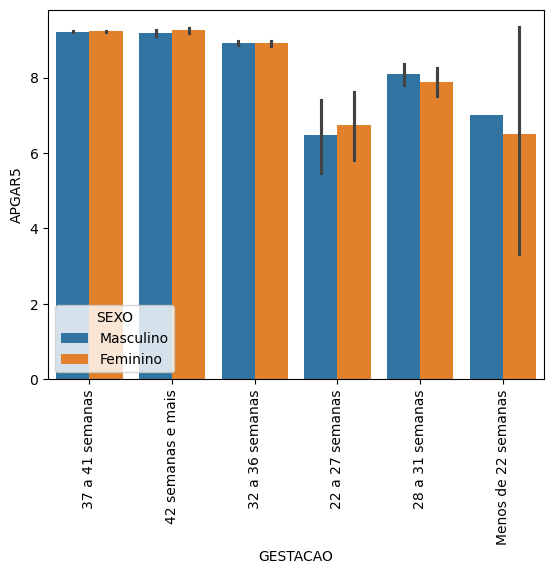

In [155]:
# Gráfico 
sns.barplot(data=df3, 
            y='APGAR5', 
            x='GESTACAO',
            hue = 'SEXO',
            estimator = 'mean'
)

plt.tick_params(axis='x', rotation = 90)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [157]:
# Gerando a tabela cruzada
tabela = pd.crosstab(df['GESTACAO'], df['APGAR5'])
tabela

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [159]:
# As ocorrências por linha podem ser somadas da seguinte forma
tabela.sum(axis=1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

In [160]:
# Com as ocorrências é possível definir a porcentagem para cada valor de apgar5 por linha
tabela_pct = tabela.div(tabela.sum(axis=1), axis=0)
tabela_pct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

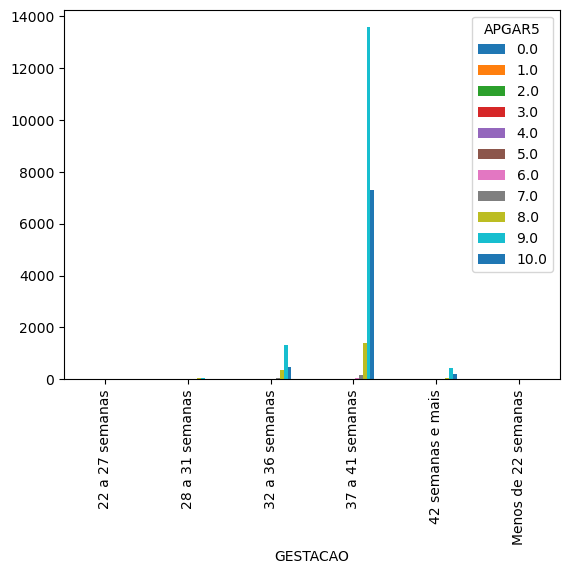

In [162]:
# O gráfico de barras pode ser obtido da seguinte forma
tabela.plot.bar()

O conjunto de dados está em consonância com o fato de que a ocorrência de nascimentos mais frequentes se dá em torno de 37 a 41 semanas de gestação. Partindo da premissa que valores < 37 semana indicam nascimento prematuro, pode-se dizer que o conjunto de dados engloba ocorrências associadas a tal premissa. 




#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [356]:
# Criando um DataFrame menor
df4 = df[['PESO', 'APGAR5']]
df4.head()


,PESO,APGAR5
0,3685,10.0
1,3055,9.0
2,3460,10.0
3,2982,10.0
4,3310,10.0


In [358]:
# Avaliando a variável peso
df4[['PESO']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PESO,27028.0,3243.190654,544.754096,258.0,2965.0,3270.0,3575.0,5985.0


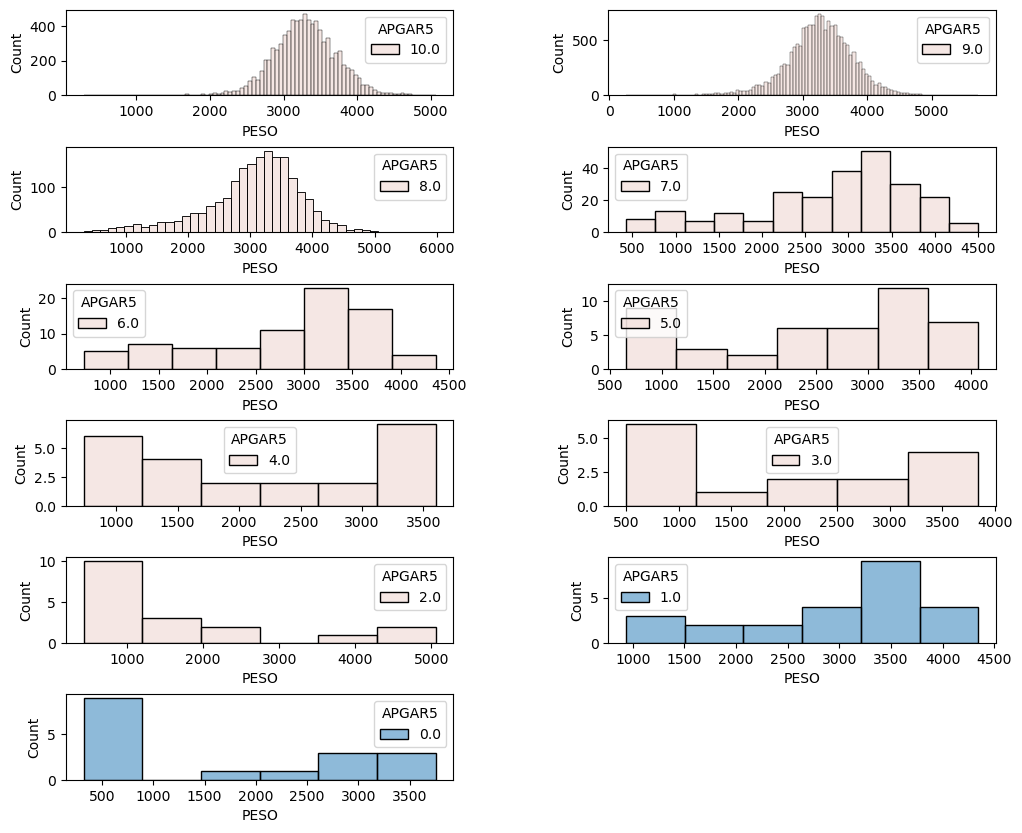

In [360]:
# Elaborando uma grade de plots para analisar o peso e o apgar5

# Figura e eixos
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(621)
ax2 = fig.add_subplot(622)
ax3 = fig.add_subplot(623)
ax4 = fig.add_subplot(624)
ax5 = fig.add_subplot(625)
ax6 = fig.add_subplot(626)
ax7 = fig.add_subplot(627)
ax8 = fig.add_subplot(628)
ax9 = fig.add_subplot(629)
ax10 = fig.add_subplot(6,2,10)
ax11 = fig.add_subplot(6,2, 11)

# plots
ax1 = sns.histplot(ax = ax1, data=df4[df4['APGAR5'] == 10], x='PESO', hue='APGAR5')
ax2 = sns.histplot(ax = ax2, data=df4[df4['APGAR5'] == 9], x='PESO', hue='APGAR5')
ax2 = sns.histplot(ax = ax3, data=df4[df4['APGAR5'] == 8], x='PESO', hue='APGAR5')
ax2 = sns.histplot(ax = ax4, data=df4[df4['APGAR5'] == 7], x='PESO', hue='APGAR5')
ax2 = sns.histplot(ax = ax5, data=df4[df4['APGAR5'] == 6], x='PESO', hue='APGAR5')
ax2 = sns.histplot(ax = ax6, data=df4[df4['APGAR5'] == 5], x='PESO', hue='APGAR5')
ax2 = sns.histplot(ax = ax7, data=df4[df4['APGAR5'] == 4], x='PESO', hue='APGAR5')
ax2 = sns.histplot(ax = ax8, data=df4[df4['APGAR5'] == 3], x='PESO', hue='APGAR5')
ax2 = sns.histplot(ax = ax9, data=df4[df4['APGAR5'] == 2], x='PESO', hue='APGAR5')
ax2 = sns.histplot(ax = ax10, data=df4[df4['APGAR5'] == 1], x='PESO', hue='APGAR5')
ax2 = sns.histplot(ax = ax11, data=df4[df4['APGAR5'] == 0], x='PESO', hue='APGAR5')

# Ajustes dos subplots
plt.subplots_adjust(wspace=.4, hspace=.6)

<Axes: xlabel='APGAR5', ylabel='PESO'>

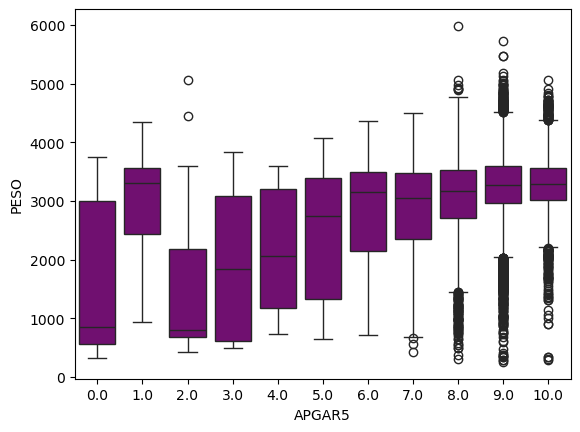

In [330]:
# Gerando um boxplot
sns.boxplot(data=df, 
            y='PESO',
            x = 'APGAR5',
            color = 'purple'
)

Como pode-se notar, tanto pelos histogramas quanto pelo boxplot, parece haver relação entre a variável ‘APGAR5’ e ‘PESO’ do bebê. Nota-se que para valores de ‘APGAR5’ entre 8 e 10 há uma distribuição de peso centrada em torno de ~ 3250 gramas, porém com a redução dos valores de ‘APGAR5’ é perceptível que os pesos começam a possuir uma maior variabilidade, mas, ao que tudo indica, em "direção" a valores menores de peso. É fato que a taxa de ocorrência de ‘APGAR5’ com valores abaixo de 6 é bem pequena e, nesses valores, é possível notar que o peso possui um alcance maior, apresentando também valores mais baixos em torno de 500 gramas com uma ocorrência significativa nestes grupos. É interessante destacar o ‘APGAR5’ = 0, este ponto parece evidenciar uma relação direta entre o valor da variável e o baixo peso do bebê.
